# Predicting which team will win a football match

The purpose of this project is to use machine learning in order to make predictions regarding football matches. 
We have 5 .csv files, each file containing different data which might help in make predictions.

In [1]:
# importing neccesary libraries
import numpy as np
import pandas as pd
from datetime import datetime as dt
import itertools

%matplotlib inline

## Reading data from the files

In [2]:
# Read data from .csv files 

loc = "voetbal_1956-20220309/"

raw_cards_file = pd.read_csv (loc + '_cards.csv')
raw_goals_file = pd.read_csv (loc + '_goals.csv')
raw_matches_file = pd.read_csv (loc + '_matches.csv')
raw_players_file = pd.read_csv (loc + '_players.csv')
raw_subs_file = pd.read_csv (loc + '_subs.csv')

## Goals

In [3]:
# Method used to overwrite values found in column 'assist'
def assist(value):
    if pd.notna(value):
        return 1
    else:
        return 0

In [4]:
# a function to remove duplicates 
def Duplicates(rawName , colName: str, previousName: str, newName: str ):
        if colName == "club":
                rawName["home"].replace({previousName: newName }, inplace=True)
                rawName["away"].replace({previousName: newName }, inplace=True)
                rawName["team"].replace({previousName: newName }, inplace=True)
        elif colName == "match":
                rawName["home"].replace({previousName: newName }, inplace=True)
                rawName["away"].replace({previousName: newName }, inplace=True)
        elif colName == "card": 
                rawName["type"].replace({previousName: newName }, inplace=True)
        else:
                print("nothing")

# a function used to get the last season
def toOneSeason(season):
    return season[5:len(season)]

In [5]:
# Some clubs have different names 
# We replace it to one name 
Duplicates(raw_goals_file, "club", "afc-ajax", "ajax-amsterdam")
Duplicates(raw_goals_file, "club", "willem-ii", "willem-ii-tilburg")
Duplicates(raw_goals_file, "club", "mvv", "mvv-maastricht")
Duplicates(raw_goals_file, "club", "vitesse", "vitesse-arnhem")
Duplicates(raw_goals_file, "club", "sc-cambuur", "cambuur-leeuwarden")
Duplicates(raw_goals_file, "club", "feyenoord", "feyenoord-rotterdam")
Duplicates(raw_goals_file, "club", "go-ahead-eagles_2", "go-ahead-eagles")

# convert the season to int 
raw_goals_file['saison'] = raw_goals_file['saison'].apply(toOneSeason)
raw_goals_file['saison'] = raw_goals_file['saison'].astype(int)

# filter the last 10 seasons 
filterSeason = raw_goals_file[(raw_goals_file['saison'] >= 2012)]

# make new dataframe in order to aggregate
dfGoals = pd.DataFrame(filterSeason)

# We use assist function for both 'assist' and 'player' colunms to count the assists and goals for each game
assistNumber = raw_goals_file['assist'].apply(assist)
goalNumber = raw_goals_file['player'].apply(assist)

dfGoals['assistNumber'] = assistNumber
dfGoals['goalNumber'] = goalNumber

# we drop the unneccesary columns 
dfGoals.drop(columns=['new_score','type','minute','round'])

,Unnamed: 0,saison,home,away,team,player,assist,assistNumber,goalNumber
50894,0,2012,ado-den-haag,ajax-amsterdam,ajax-amsterdam,Jody Lukoki,Theo Janssen,1,1
50895,1,2012,ado-den-haag,ajax-amsterdam,ajax-amsterdam,Jan Vertonghen,Ismaïl Aissati,1,1
50896,2,2012,ado-den-haag,az-alkmaar,az-alkmaar,Charlison Benschop,Brett Holman,1,1
50897,3,2012,ado-den-haag,az-alkmaar,az-alkmaar,Charlison Benschop,Maarten Martens,1,1
50898,4,2012,ado-den-haag,az-alkmaar,az-alkmaar,Charlison Benschop,Rasmus Elm,1,1
...,...,...,...,...,...,...,...,...,...
60864,639,2022,willem-ii-tilburg,cambuur-leeuwarden,willem-ii-tilburg,Godfried Roemeratoe,Anargyros Kampetsis,1,1
60865,640,2022,willem-ii-tilburg,cambuur-leeuwarden,cambuur-leeuwarden,Mitchell Paulissen,NaN,0,1
60866,641,2022,willem-ii-tilburg,sparta-rotterdam,sparta-rotterdam,Bart Vriends,Bryan Smeets,1,1
60867,642,2022,willem-ii-tilburg,sparta-rotterdam,sparta-rotterdam,Bart Vriends,Sven Mijnans,1,1


In [6]:
# the best player of Ajax (Assist, Goals)
filterAjaxPlayers = dfGoals[(dfGoals['team'] == "ajax-amsterdam")]
playersAssistAjax = filterAjaxPlayers.groupby('player')['assistNumber'].sum()
print(playersAssistAjax.nlargest(n=5))

playersGoalsAjax = filterAjaxPlayers.groupby('player')['goalNumber'].sum()
print(playersGoalsAjax.nlargest(n=5))

player
Davy Klaassen          48
Klaas-Jan Huntelaar    37
Hakim Ziyech           29
Dušan Tadić            28
Kasper Dolberg         28
Name: assistNumber, dtype: int64
player
Davy Klaassen          61
Dušan Tadić            61
Lasse Schöne           49
Klaas-Jan Huntelaar    45
Hakim Ziyech           38
Name: goalNumber, dtype: int64


In [7]:
# the best player of Psv (Assist, Goals)
filterPsvPlayers = dfGoals[(dfGoals['team'] == "psv-eindhoven")]
playersAssistPsv = filterPsvPlayers.groupby('player')['assistNumber'].sum()
print(playersAssistPsv.nlargest(n=5))

playersGoalsPsv = filterPsvPlayers.groupby('player')['goalNumber'].sum()
print(playersGoalsPsv.nlargest(n=5))


player
Luuk de Jong           78
Donyell Malen          33
Georginio Wijnaldum    26
Jürgen Locadia         26
Gastón Pereiro         23
Name: assistNumber, dtype: int64
player
Luuk de Jong           94
Jürgen Locadia         45
Gastón Pereiro         44
Georginio Wijnaldum    41
Donyell Malen          40
Name: goalNumber, dtype: int64


Text(0, 0.5, 'Assist')

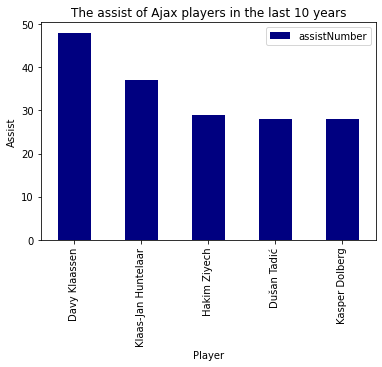

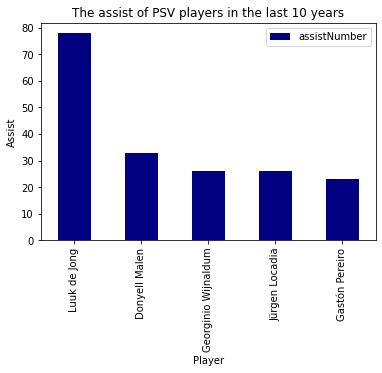

In [8]:
# plot Assist
dfAjaxAssist = pd.DataFrame(playersAssistAjax.nlargest(n=5))
ax = dfAjaxAssist.plot(lw=2, colormap='jet', title='The assist of Ajax players in the last 10 years', kind = 'bar')
ax.set_xlabel("Player")
ax.set_ylabel("Assist")

dfPsvAssist = pd.DataFrame(playersAssistPsv.nlargest(n=5))
ax = dfPsvAssist.plot(lw=2, colormap='jet', title='The assist of PSV players in the last 10 years', kind = 'bar')
ax.set_xlabel("Player")
ax.set_ylabel("Assist")


Text(0, 0.5, 'Goals')

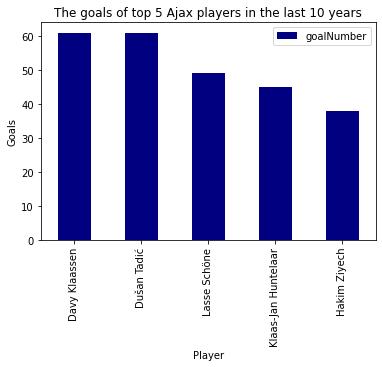

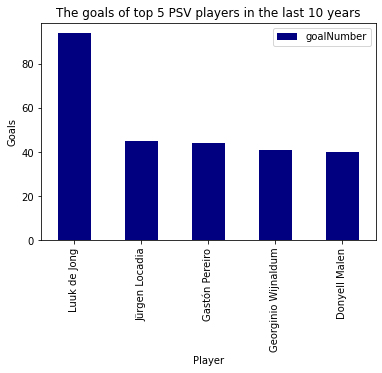

In [9]:
# plot Goals
dfAjaxGoals = pd.DataFrame(playersGoalsAjax.nlargest(n=5))
ax = dfAjaxGoals.plot(lw=2, colormap='jet', kind = 'bar', title='The goals of top 5 Ajax players in the last 10 years')
ax.set_xlabel("Player")
ax.set_ylabel("Goals")

dfPsvGoals = pd.DataFrame(playersGoalsPsv.nlargest(n=5))
ax = dfPsvGoals.plot(lw=2, colormap='jet', kind = 'bar', title='The goals of top 5 PSV players in the last 10 years')
ax.set_xlabel("Player")
ax.set_ylabel("Goals")

### PSV VS AJAX (Players Goals and assists)

#### PSV Stadion

In [10]:
# The best 3 player in the Ajax - Psv Match  in psv Stadion (Ajax stats)
filterAjaxPlayersInPsvStadion = dfGoals[(dfGoals['team'] == "ajax-amsterdam") & (dfGoals['home'] == "psv-eindhoven")]
playersAssistAjaxInPsvStadion = filterAjaxPlayersInPsvStadion.groupby('player')['assistNumber'].sum()
print(playersAssistAjaxInPsvStadion.nlargest(n=5))

playersGoalsAjaxInPsvStadion = filterAjaxPlayersInPsvStadion.groupby('player')['goalNumber'].sum()
print(playersGoalsAjaxInPsvStadion.nlargest(n=5))

player
Anwar El Ghazi       2
Arkadiusz Milik      1
Brian Brobbey        1
Christian Eriksen    1
Derk Boerrigter      1
Name: assistNumber, dtype: int64
player
Anwar El Ghazi         2
Kolbeinn Sigþórsson    2
Arkadiusz Milik        1
Brian Brobbey          1
Christian Eriksen      1
Name: goalNumber, dtype: int64


In [11]:
# The best 3 player in the Ajax - Psv Match  in psv Stadium (psv stats)
filterPsvPlayersInPsvStadion = dfGoals[(dfGoals['team'] == "psv-eindhoven") & (dfGoals['away'] == "ajax-amsterdam")]
playersAssistPsvInPsvStadion = filterPsvPlayersInPsvStadion.groupby('player')['assistNumber'].sum()
print(playersAssistPsvInPsvStadion.nlargest(n=5))

playersGoalsPsvInPsvStadion = filterPsvPlayersInPsvStadion.groupby('player')['goalNumber'].sum()
print(playersGoalsPsvInPsvStadion.nlargest(n=5))

player
Luuk de Jong      3
Donyell Malen     1
Hirving Lozano    1
Jeremain Lens     1
Ji-Sung Park      1
Name: assistNumber, dtype: int64
player
Luuk de Jong      3
Gastón Pereiro    2
Jeremain Lens     2
Tim Matavž        2
Donyell Malen     1
Name: goalNumber, dtype: int64


Text(0, 0.5, 'Goals')

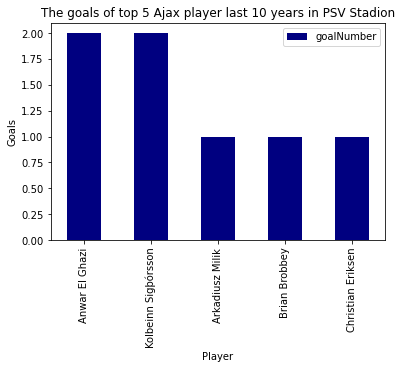

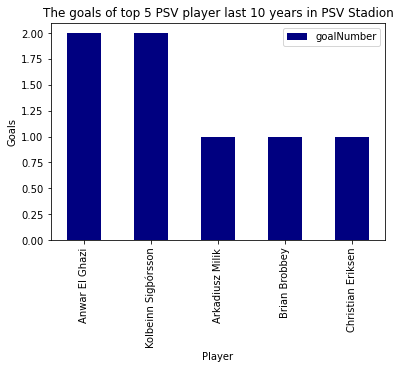

In [12]:
# plot Goals Ajax vs Psv in Psv stadion
dfAjaxGoalsinPsvStadion = pd.DataFrame(playersGoalsAjaxInPsvStadion.nlargest(n=5))
ax = dfAjaxGoalsinPsvStadion.plot(lw=2, colormap='jet', kind = 'bar', title='The goals of top 5 Ajax player last 10 years in PSV Stadion')
ax.set_xlabel("Player")
ax.set_ylabel("Goals")

dfPsvGoalsinPsvStadion = pd.DataFrame(playersGoalsAjaxInPsvStadion.nlargest(n=5))
ax = dfPsvGoalsinPsvStadion.plot(lw=2, colormap='jet', kind = 'bar', title='The goals of top 5 PSV player last 10 years in PSV Stadion')
ax.set_xlabel("Player")
ax.set_ylabel("Goals")

#### Ajax Stadion

In [13]:
# The best 3 player in the Ajax - Psv Match  in Ajax Stadion (Ajax stats)
filterAjaxPlayersInAjaxStadion = dfGoals[(dfGoals['team'] == "ajax-amsterdam") & (dfGoals['away'] == "psv-eindhoven")]
playersAssistAjaxInAjaxStadion = filterAjaxPlayersInAjaxStadion.groupby('player')['assistNumber'].sum()
print(playersAssistAjaxInAjaxStadion.nlargest(n=5))

playersGoalsAjaxInAjaxStadion = filterAjaxPlayersInAjaxStadion.groupby('player')['goalNumber'].sum()
print(playersGoalsAjaxInAjaxStadion.nlargest(n=5))

player
Antony               2
Anwar El Ghazi       1
David Neres          1
Davy Klaassen        1
Donny van de Beek    1
Name: assistNumber, dtype: int64
player
Antony           2
David Neres      2
Davy Klaassen    2
Dušan Tadić      2
Quincy Promes    2
Name: goalNumber, dtype: int64


In [14]:
# The best 3 player in the Ajax - Psv Match  in Ajax Stadion (Psv stats)
filterAjaxPlayersInPsvStadion = dfGoals[(dfGoals['team'] == "psv-eindhoven") & (dfGoals['home'] == "ajax-amsterdam")]
playersAssistAjaxInPsvStadion = filterAjaxPlayersInPsvStadion.groupby('player')['assistNumber'].sum()
print(playersAssistAjaxInPsvStadion.nlargest(n=5))

playersGoalsAjaxInPsvStadion = filterAjaxPlayersInPsvStadion.groupby('player')['goalNumber'].sum()
print(playersGoalsAjaxInPsvStadion.nlargest(n=5))

player
Eran Zahavi         2
Gastón Pereiro      1
Jeremain Lens       1
Luciano Narsingh    1
Luuk de Jong        1
Name: assistNumber, dtype: int64
player
Eran Zahavi          2
Gastón Pereiro       2
Florian Jozefzoon    1
Jeremain Lens        1
Luciano Narsingh     1
Name: goalNumber, dtype: int64


Text(0, 0.5, 'Goals')

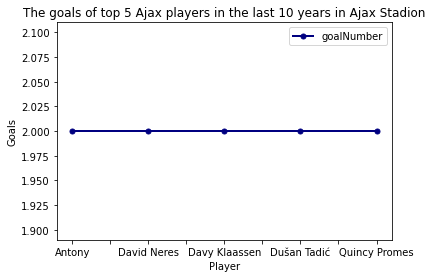

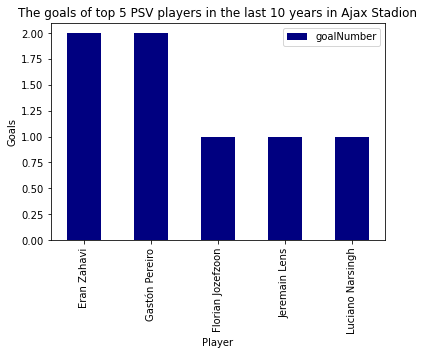

In [15]:
# plot Goals Ajax vs Psv in Ajax Stadion
dfAjaxGoalsinAjaxStadion = pd.DataFrame(playersGoalsAjaxInAjaxStadion.nlargest(n=5))
ax = dfAjaxGoalsinAjaxStadion.plot(lw=2, colormap='jet', marker='.', markersize=10, title='The goals of top 5 Ajax players in the last 10 years in Ajax Stadion')
ax.set_xlabel("Player")
ax.set_ylabel("Goals")

dfPsvGoalsinAjaxStadion = pd.DataFrame(playersGoalsAjaxInPsvStadion.nlargest(n=5))
ax = dfPsvGoalsinAjaxStadion.plot(lw=2, colormap='jet', kind = 'bar', title='The goals of top 5 PSV players in the last 10 years in Ajax Stadion')
ax.set_xlabel("Player")
ax.set_ylabel("Goals")

#### Home Goals and Assists

In [16]:
# Home team assist and goals
filterAssist = dfGoals[(dfGoals['assistNumber'] == 1) & (dfGoals['goalNumber'] == 1)]
groupByHomeAssist = filterAssist.groupby('home')['assistNumber'].sum()
print(groupByHomeAssist.nlargest(n=5))

# goals 
groupByHomeGoals = dfGoals.groupby('home')['goalNumber'].sum()
print(groupByHomeGoals.nlargest(n=5))

home
ajax-amsterdam         443
psv-eindhoven          408
feyenoord-rotterdam    385
sc-heerenveen          371
az-alkmaar             368
Name: assistNumber, dtype: int64
home
ajax-amsterdam         642
psv-eindhoven          634
feyenoord-rotterdam    583
az-alkmaar             579
heracles-almelo        576
Name: goalNumber, dtype: int64


#### Away Goals and Assists

In [17]:
# Away assist and goals 
groupByAwayAssist = filterAssist.groupby('away')['assistNumber'].sum()
print(groupByAwayAssist.nlargest(n=5))

# goals 
groupByAwayGoals = filterAssist.groupby('away')['goalNumber'].sum()
print(groupByAwayGoals.nlargest(n=5))

away
psv-eindhoven      393
sc-heerenveen      387
ajax-amsterdam     366
heracles-almelo    365
az-alkmaar         360
Name: assistNumber, dtype: int64
away
psv-eindhoven      393
sc-heerenveen      387
ajax-amsterdam     366
heracles-almelo    365
az-alkmaar         360
Name: goalNumber, dtype: int64


## Cards

In [18]:
# Some clubs have different names 
# We replace it to one name 
Duplicates(raw_cards_file, "club", "afc-ajax", "ajax-amsterdam")
Duplicates(raw_cards_file, "club", "willem-ii", "willem-ii-tilburg")
Duplicates(raw_cards_file, "club", "mvv", "mvv-maastricht")
Duplicates(raw_cards_file, "club", "vitesse", "vitesse-arnhem")
Duplicates(raw_cards_file, "club", "sc-cambuur", "cambuur-leeuwarden")
Duplicates(raw_cards_file, "club", "feyenoord", "feyenoord-rotterdam")
Duplicates(raw_cards_file, "club", "go-ahead-eagles_2", "go-ahead-eagles")

# The cards have different names and we convert them to numbers in order to count them 
Duplicates(raw_cards_file, "card", "rode kaart", "red-card")
Duplicates(raw_cards_file, "card", "rode", "red-card")
Duplicates(raw_cards_file, "card", "kaartrode", "red-card")
Duplicates(raw_cards_file, "card", "gele kaart", "yellow-card")
Duplicates(raw_cards_file, "card", "gele", "yellow-card")
Duplicates(raw_cards_file, "card", "kaartgele", "yellow-card")

# convert the season to int 
raw_cards_file['saison'] = raw_cards_file['saison'].apply(toOneSeason)
raw_cards_file['saison'] = raw_cards_file['saison'].astype(int)

# filter the last 10 seasons 
filterSeasonCards = raw_cards_file[(raw_cards_file['saison'] >= 2012)]

# make new dataframe in order to aggregate
dfCards = pd.DataFrame(filterSeasonCards)
cardsNumber= dfCards['type']
dfCards['cardsNumber'] = cardsNumber
dfCards["cardsNumber"].replace({"red-card": 2, "yellow-card": 1}, inplace=True)
dfCards


,Unnamed: 0,saison,round,home,away,team,player,minute,type,cardsNumber
22582,0,2012,26,ado-den-haag,ajax-amsterdam,ado-den-haag,jens-toornstra,34.0,yellow-card,1
22583,1,2012,26,ado-den-haag,ajax-amsterdam,ado-den-haag,aleksander-radosavljevic,44.0,yellow-card,1
22584,2,2012,26,ado-den-haag,ajax-amsterdam,ado-den-haag,ali-boussaboun,25.0,red-card,2
22585,3,2012,26,ado-den-haag,ajax-amsterdam,ajax-amsterdam,toby-alderweireld,40.0,yellow-card,1
22586,4,2012,26,ado-den-haag,ajax-amsterdam,ajax-amsterdam,theo-janssen,78.0,yellow-card,1
...,...,...,...,...,...,...,...,...,...,...
32287,685,2022,25,willem-ii-tilburg,sc-heerenveen,willem-ii-tilburg,goerkem-saglam,71.0,yellow-card,1
32288,686,2022,12,willem-ii-tilburg,sparta-rotterdam,willem-ii-tilburg,kwasi-wriedt,26.0,yellow-card,1
32289,687,2022,12,willem-ii-tilburg,sparta-rotterdam,sparta-rotterdam,dirk-abels,77.0,yellow-card,1
32290,688,2022,12,willem-ii-tilburg,sparta-rotterdam,sparta-rotterdam,adil-auassar,34.0,yellow-card,1


In [19]:
# filter the home and away team 
filterHomeTeam = dfCards[ (dfCards['home'] == dfCards['team'])]
filterAwayTeam = dfCards[ (dfCards['away'] == dfCards['team'])]

##### Cards Away

In [20]:
# Away yellow cards
filterAwayYellowCard = filterAwayTeam[(filterAwayTeam['cardsNumber'] == 1)]
print(f'{len(filterAwayYellowCard.index)} yellow cards is made by away team ')

5217 yellow cards is made by away team 


In [21]:
# How much yellow cards did Ajax get Away 
filterAjaxYellowCardsAway = filterAwayYellowCard[(filterAwayYellowCard['away'] == 'ajax-amsterdam')]
print(f'{len(filterAjaxYellowCardsAway.index)} yellow cards is made by Ajax (Away)')

247 yellow cards is made by Ajax (Away)


In [22]:
# How much yellow cards did PSV get Away 
filterPsvYellowCardsAway = filterAwayYellowCard[(filterAwayYellowCard['away'] == 'psv-eindhoven')]
print(f'{len(filterPsvYellowCardsAway.index)} yellow cards is made by PSV (Away)')

253 yellow cards is made by PSV (Away)


In [23]:
# Away red cards
filterAwayRedCard = filterAwayTeam[(filterAwayTeam['cardsNumber'] == 2)]
print(f'{len(filterAwayRedCard.index)} red cards is made by away team ')

210 red cards is made by away team 


In [24]:
# How much red cards did Ajax get Away 
filterAjaxRedCardsAway = filterAwayRedCard[(filterAwayRedCard['away'] == 'ajax-amsterdam')]
print(f'{len(filterAjaxRedCardsAway.index)} red cards is made by Ajax (Away)')

5 red cards is made by Ajax (Away)


In [25]:
# How much red cards did Psv get Away 
filterPsvRedCardsAway = filterAwayRedCard[(filterAwayRedCard['away'] == 'psv-eindhoven')]
print(f'{len(filterPsvRedCardsAway.index)} red cards is made by Psv (Away)')

8 red cards is made by Psv (Away)


##### Cards Home

In [26]:
# Home yellow cards
filterHomeYellowCard = filterHomeTeam[(filterHomeTeam['cardsNumber'] == 1)]
print(f'{len(filterHomeYellowCard.index)} yellow cards is made by home team ')

3943 yellow cards is made by home team 


In [27]:
# How much yellow cards did Ajax get Home 
filterAjaxYellowCardsHome = filterHomeYellowCard[(filterHomeYellowCard['home'] == 'ajax-amsterdam')]
print(f'{len(filterAjaxYellowCardsHome.index)} yellow cards is made by Ajax (Home)')

128 yellow cards is made by Ajax (Home)


In [28]:
# How much yellow cards did PSV get Away 
filterPsvYellowCardsHome = filterHomeYellowCard[(filterHomeYellowCard['home'] == 'psv-eindhoven')]
print(f'{len(filterPsvYellowCardsHome.index)} yellow cards is made by PSV (Home)')

186 yellow cards is made by PSV (Home)


In [29]:
# Home red cards 
filterHomeRedCard = filterHomeTeam[(filterHomeTeam['cardsNumber'] == 2)]
print(f'{len(filterHomeRedCard.index)} red cards is made by home team ')

150 red cards is made by home team 


In [30]:
# How much red cards did Ajax get Home 
filterAjaxRedCardsHome = filterHomeRedCard[(filterHomeRedCard['home'] == 'ajax-amsterdam')]
print(f'{len(filterAjaxRedCardsHome.index)} red cards is made by Ajax (Home)')

6 red cards is made by Ajax (Home)


In [31]:
# How much red cards did Psv get Home 
filterPsvRedCardsHome = filterHomeRedCard[(filterHomeRedCard['home'] == 'psv-eindhoven')]
print(f'{len(filterPsvRedCardsHome.index)} red cards is made by Psv (Home)')

3 red cards is made by Psv (Home)


#### PSV VS AJAX (Yellow and red cards)

##### PSV Stadion

In [32]:
# How much red cards did Ajax get in psv stadion againt PSV
filterAjaxCardsInPsvStadion = dfCards[(dfCards['team'] == "ajax-amsterdam") & (dfCards['home'] == "psv-eindhoven")]
filterAjaxCardsInPsvStadionRedCards = filterAjaxCardsInPsvStadion[(filterAjaxCardsInPsvStadion['cardsNumber'] == 2)]
print(f'{len(filterAjaxCardsInPsvStadionRedCards.index)} red cards is made by Ajax in PSV Stadion (Away)')

1 red cards is made by Ajax in PSV Stadion (Away)


In [33]:
# How much yellow cards did Ajax get in psv stadion againt PSV
filterAjaxCardsInPsvStadionYellowCards = filterAjaxCardsInPsvStadion[(filterAjaxCardsInPsvStadion['cardsNumber'] == 1)]
print(f'{len(filterAjaxCardsInPsvStadionYellowCards.index)} yellow cards is made by Ajax in PSV Stadion (Away)')

18 yellow cards is made by Ajax in PSV Stadion (Away)


In [34]:
# How much red cards did Psv get in psv stadion againt Ajax
filterPSVCardsInPsvStadion = dfCards[(dfCards['team'] == "psv-eindhoven") & (dfCards['away'] == "ajax-amsterdam")]
filterPSVCardsInPsvStadionRedCards = filterPSVCardsInPsvStadion[(filterPSVCardsInPsvStadion['cardsNumber'] == 2)]
print(f'{len(filterPSVCardsInPsvStadionRedCards.index)} red cards is made by PSV in PSV stadion againts ajax (Home)')

0 red cards is made by PSV in PSV stadion againts ajax (Home)


In [35]:
# How much yellow cards did Psv get in psv studium againt Ajax
filterPSVCardsInPsvStadionYellowCards = filterPSVCardsInPsvStadion[(filterPSVCardsInPsvStadion['cardsNumber'] == 1)]
print(f'{len(filterPSVCardsInPsvStadionYellowCards.index)} yellow cards is made by PSV in PSV stadion againts ajax (Home)')

23 yellow cards is made by PSV in PSV stadion againts ajax (Home)


<AxesSubplot:title={'center':'Yellow cards made by PSV or Ajax in PSV Stadion'}>

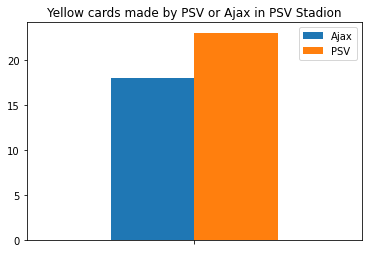

In [36]:
plotdata = pd.DataFrame({
    "Ajax": len(filterAjaxCardsInPsvStadionYellowCards.index),
    "PSV": len(filterPSVCardsInPsvStadionYellowCards.index)
    },
    index=[''],
   
)
plotdata.plot(kind = 'bar', title ="Yellow cards made by PSV or Ajax in PSV Stadion")

<AxesSubplot:title={'center':'Red cards made by PSV or Ajax in PSV Stadion'}>

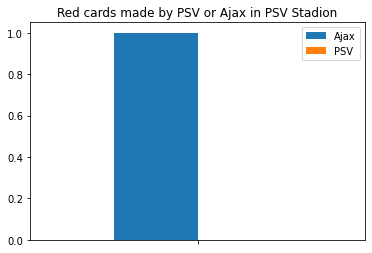

In [37]:
plotdata = pd.DataFrame({
    "Ajax": len(filterAjaxCardsInPsvStadionRedCards.index),
    "PSV": len(filterPSVCardsInPsvStadionRedCards.index)
    },
    index=[''],
   
)
plotdata.plot(kind = 'bar', title ="Red cards made by PSV or Ajax in PSV Stadion")

##### Ajax Stadion

In [38]:
# How much red cards did Ajax get in Ajax stadion againt PSV
filterAjaxCardsInAjaxStadion = dfCards[(dfCards['team'] == "ajax-amsterdam") & (dfCards['away'] == "psv-eindhoven")]
filterAjaxCardsInAjaxStadionRedCards = filterAjaxCardsInAjaxStadion[(filterAjaxCardsInAjaxStadion['cardsNumber'] == 2)]
print(f'{len(filterAjaxCardsInAjaxStadionRedCards.index)} red cards is made by Ajax in Ajax Stadion (Home)')

1 red cards is made by Ajax in Ajax Stadion (Home)


In [39]:
# How much yellow cards did Ajax get in Ajax stadion againt PSV
filterAjaxCardsInAjaxStadionYellowCards = filterAjaxCardsInAjaxStadion[(filterAjaxCardsInAjaxStadion['cardsNumber'] == 1)]
print(f'{len(filterAjaxCardsInAjaxStadionYellowCards.index)} yellow cards is made by Ajax in Ajax Stadion (Home)')

15 yellow cards is made by Ajax in Ajax Stadion (Home)


In [40]:
# How much red cards did PSV get in Ajax stadion againt Ajax
filterPSVCardsInAjaxStadion = dfCards[(dfCards['team'] == "psv-eindhoven") & (dfCards['home'] == "ajax-amsterdam")]
filterPSVCardsInAjaxStadionRedCards = filterPSVCardsInAjaxStadion[(filterPSVCardsInAjaxStadion['cardsNumber'] == 2)]
print(f'{len(filterPSVCardsInAjaxStadionRedCards.index)} red cards is made by PSV in Ajax Stadion (Away)')

0 red cards is made by PSV in Ajax Stadion (Away)


In [41]:
# How much yellow cards did PSV get in Ajax stadion againt Ajax
filterPSVCardsInAjaxStadionYellowCards = filterPSVCardsInAjaxStadion[(filterPSVCardsInAjaxStadion['cardsNumber'] == 1)]
print(f'{len(filterPSVCardsInAjaxStadionYellowCards.index)} yellow cards is made by PSV in Ajax Stadion (Away)')

23 yellow cards is made by PSV in Ajax Stadion (Away)


<AxesSubplot:title={'center':'Yellow cards made by PSV or Ajax in Ajax Stadion'}>

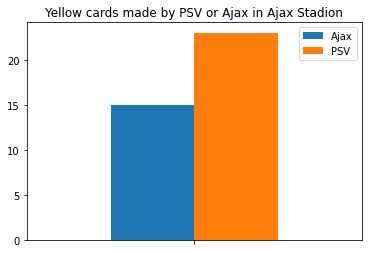

In [42]:
plotdata = pd.DataFrame({
    "Ajax": len(filterAjaxCardsInAjaxStadionYellowCards.index),
    "PSV": len(filterPSVCardsInAjaxStadionYellowCards.index)
    },
    index=[''],
   
)
plotdata.plot(kind = 'bar', title ="Yellow cards made by PSV or Ajax in Ajax Stadion")

<AxesSubplot:title={'center':'Red cards made by PSV or Ajax in Ajax Stadion'}>

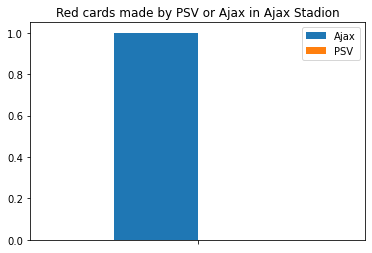

In [43]:
plotdata = pd.DataFrame({
    "Ajax": len(filterAjaxCardsInAjaxStadionRedCards.index),
    "PSV": len(filterPSVCardsInAjaxStadionRedCards.index)
    },
    index=['']
)
plotdata.plot(kind = 'bar', title ="Red cards made by PSV or Ajax in Ajax Stadion")

## Players

In [44]:
# we drop the unneccesary columns 
raw_players_file.drop(columns=['round'])

Duplicates(raw_players_file, "club", "afc-ajax", "ajax-amsterdam")
Duplicates(raw_players_file, "club", "willem-ii", "willem-ii-tilburg")
Duplicates(raw_players_file, "club", "mvv", "mvv-maastricht")
Duplicates(raw_players_file, "club", "vitesse", "vitesse-arnhem")
Duplicates(raw_players_file, "club", "sc-cambuur", "cambuur-leeuwarden")
Duplicates(raw_players_file, "club", "feyenoord", "feyenoord-rotterdam")
Duplicates(raw_players_file, "club", "go-ahead-eagles_2", "go-ahead-eagles")


# convert the season to int 
raw_players_file['saison'] = raw_players_file['saison'].apply(toOneSeason)
raw_players_file['saison'] = raw_players_file['saison'].astype(int)

# # filter the last 10 seasons 
filterSeasonMatchesPlayers = raw_players_file[(raw_players_file['saison'] >= 2012)]
# make new dataframe in order to aggregate
dfPlayer = pd.DataFrame(filterSeasonMatchesPlayers)
startedNumber= dfPlayer['started']
dfPlayer['startedNumber'] = startedNumber
dfPlayer["startedNumber"].replace({True: 1, False: 0}, inplace=True)
dfPlayer

,index,saison,round,home,away,team,player,started,startedNumber
409991,0,2012,26,ado-den-haag,ajax-amsterdam,ado-den-haag,gino-coutinho,True,1
409992,1,2012,26,ado-den-haag,ajax-amsterdam,ado-den-haag,chris-kum,True,1
409993,2,2012,26,ado-den-haag,ajax-amsterdam,ado-den-haag,kenneth-omeruo,True,1
409994,3,2012,26,ado-den-haag,ajax-amsterdam,ado-den-haag,filip-luksik,True,1
409995,4,2012,26,ado-den-haag,ajax-amsterdam,ado-den-haag,gabor-horvath,True,1
...,...,...,...,...,...,...,...,...,...
531095,9368,2022,12,willem-ii-tilburg,sparta-rotterdam,sparta-rotterdam,vito-van-crooij,False,0
531096,9369,2022,12,willem-ii-tilburg,sparta-rotterdam,sparta-rotterdam,mario-engels,False,0
531097,9370,2022,12,willem-ii-tilburg,sparta-rotterdam,sparta-rotterdam,benjamin-van-leer,False,0
531098,9371,2022,12,willem-ii-tilburg,sparta-rotterdam,sparta-rotterdam,tim-coremans,False,0


In [45]:
filterPlayers = dfPlayer[(dfPlayer['team'] == dfPlayer['away']) &
                         (dfPlayer['team'] == dfPlayer['home'])]

# The most players how played least 10 years
groupByPlayers = dfPlayer.groupby(['player' , "team"])['startedNumber'].sum()
print(groupByPlayers.nlargest(n=10))

# The most players how played least 10 years in AJAX
filterPlayersAjax = dfPlayer[(dfPlayer['team'] == "ajax-amsterdam")]
groupByAjaxPlayers = filterPlayersAjax.groupby('player')['startedNumber'].sum()
print(groupByAjaxPlayers.nlargest(n=5))

# The most players how played least 10 years in PSV
filterPlayersPSV = dfPlayer[(dfPlayer['team'] == "psv-eindhoven")]
groupByPSVPlayers = filterPlayersPSV.groupby('player')['startedNumber'].sum()
print(groupByPSVPlayers.nlargest(n=5))

player               team               
bram-van-polen       pec-zwolle             233
aaron-meijers        ado-den-haag           222
mark-van-der-maarel  fc-utrecht             219
sergio-padt          fc-groningen           211
guram-kashia         vitesse-arnhem         201
willem-janssen_2     fc-utrecht             191
jeroen-zoet          psv-eindhoven          185
jordens-peters       willem-ii-tilburg      181
jens-toornstra       feyenoord-rotterdam    179
daley-blind          ajax-amsterdam         168
Name: startedNumber, dtype: int64
player
daley-blind      168
lasse-schoene    156
joel-veltman     150
davy-klaassen    141
andre-onana      131
Name: startedNumber, dtype: int64
player
jeroen-zoet       185
luuk-de-jong      142
jetro-willems     125
santiago-arias    120
jorrit-hendrix    117
Name: startedNumber, dtype: int64


## Matches

In [46]:
Duplicates(raw_matches_file, "match", "afc-ajax", "ajax-amsterdam")
Duplicates(raw_matches_file, "match", "willem-ii", "willem-ii-tilburg")
Duplicates(raw_matches_file, "match", "mvv", "mvv-maastricht")
Duplicates(raw_matches_file, "match", "vitesse", "vitesse-arnhem")
Duplicates(raw_matches_file, "match", "sc-cambuur", "cambuur-leeuwarden")
Duplicates(raw_matches_file, "match", "feyenoord", "feyenoord-rotterdam")
Duplicates(raw_matches_file, "match", "go-ahead-eagles_2", "go-ahead-eagles")

# convert the season to int 
raw_matches_file['saison'] = raw_matches_file['saison'].apply(toOneSeason)
raw_matches_file['saison'] = raw_matches_file['saison'].astype(int)

# # filter the last 10 seasons 
filterSeasonMatches = raw_matches_file[(raw_matches_file['saison'] >= 2012) & 
                                        (raw_matches_file['home_score'] != "-") &
                                         (raw_matches_file['away_score'] != "-")]

filterSeasonMatches['home_score'] = pd.to_numeric(filterSeasonMatches['home_score'])
filterSeasonMatches['away_score'] = pd.to_numeric(filterSeasonMatches['away_score'])

# we drop the unneccesary columns 
filtered_matches = filterSeasonMatches.drop(columns=['stadium','home_first_card','home_last_card',
                                                 'away_first_card', 'time','date','round',
                                                 'spectators', 'ref','linesman1','linesman2', 'away_last_card',
                                                 'home_yellow', 'home_yelred', 'away_yellow','first_goal', 'last_goal',
                                                  'away_red','home_red', 'away_yelred'])

# drop the empty rows
filtered_matches.dropna()
filtered_matches

C:\Users\malja\AppData\Local\Temp/ipykernel_13860/3111827600.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filterSeasonMatches['home_score'] = pd.to_numeric(filterSeasonMatches['home_score'])
C:\Users\malja\AppData\Local\Temp/ipykernel_13860/3111827600.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filterSeasonMatches['away_score'] = pd.to_numeric(filterSeasonMatches['away_score'])


,Unnamed: 0,saison,home,away,home_score,away_score
16566,0,2012,ado-den-haag,ajax-amsterdam,0,2
16567,1,2012,ado-den-haag,az-alkmaar,0,6
16568,2,2012,ado-den-haag,de-graafschap,3,5
16569,3,2012,ado-den-haag,fc-groningen,3,0
16570,4,2012,ado-den-haag,fc-twente,1,1
...,...,...,...,...,...,...
19924,300,2022,willem-ii-tilburg,psv-eindhoven,2,1
19925,301,2022,willem-ii-tilburg,rkc-waalwijk,3,1
19926,302,2022,willem-ii-tilburg,cambuur-leeuwarden,1,3
19927,303,2022,willem-ii-tilburg,sc-heerenveen,0,0


In [47]:
# WinningHomeTeamFilter
WinningHomeTeamFilter = filtered_matches[ (filtered_matches['home_score'] > filtered_matches['away_score'])]
print(f'The Home team won {len(WinningHomeTeamFilter.index)} matches')

# WinningAwayTeamFilter
WinningAwayTeamFilter = filtered_matches[ (filtered_matches['home_score'] < filtered_matches['away_score'])]
print(f'The Away team won {len(WinningAwayTeamFilter.index)} matches')

# DrawFilter
DrawTeamFilter = filtered_matches[ (filtered_matches['home_score'] == filtered_matches['away_score'])]
print(f'The draw was in {len(DrawTeamFilter.index)} matches')

The Home team won 1485 matches
The Away team won 973 matches
The draw was in 750 matches


##### Ajax General Stats

In [48]:
AjaxWinHome = filtered_matches[ (filtered_matches['home_score'] > filtered_matches['away_score']) & 
                                         (filtered_matches['home'] == "ajax-amsterdam") ]

AjaxGoalsHomeWin =AjaxWinHome['home_score'].sum()
AwayGoalsLoseAgaintsAjax =AjaxWinHome['away_score'].sum()

print(f'Ajax won {len(AjaxWinHome.index)} matches Home') 
print(f'Ajax scored {AjaxGoalsHomeWin} goals Home') 
print(f'Ajax got {len(AjaxWinHome.index) * 3} points Home when Ajax won')
print(f'Away team scored {AwayGoalsLoseAgaintsAjax} goals when Ajax won')                                               

Ajax won 139 matches Home
Ajax scored 485 goals Home
Ajax got 417 points Home when Ajax won
Away team scored 64 goals when Ajax won


In [49]:
AjaxloseHome = filtered_matches[ (filtered_matches['home_score'] < filtered_matches['away_score']) & 
                                         (filtered_matches['home'] == "ajax-amsterdam") ]

AjaxGoalsHomeLose =AjaxloseHome['home_score'].sum()
AwayGoalsWonAgaintsAjax =AjaxloseHome['away_score'].sum()

print(f'Ajax lost {len(AjaxloseHome.index)} matches Home') 
print(f'Ajax scored {AjaxGoalsHomeLose} goals Home when he lost')
print(f'Away team scored {AwayGoalsWonAgaintsAjax} goals when Ajax lost')   

Ajax lost 14 matches Home
Ajax scored 7 goals Home when he lost
Away team scored 26 goals when Ajax lost


In [50]:
AjaxDrawHome = filtered_matches[ (filtered_matches['home_score'] == filtered_matches['away_score']) & 
                                         (filtered_matches['home'] == "ajax-amsterdam") ]

AjaxGoalsDraw =AjaxDrawHome['home_score'].sum()
AwayGoalsDraw =AjaxDrawHome['away_score'].sum()

print(f'Ajax tied {len(AjaxDrawHome.index)} matches Home') 
print(f'Ajax scored {AjaxGoalsDraw} goals Home when he tied')
print(f'Away team scored {AwayGoalsDraw} goals when he tied with Ajax') 

Ajax tied 26 matches Home
Ajax scored 30 goals Home when he tied
Away team scored 30 goals when he tied with Ajax


In [51]:
# Total Ajax Goals Home
totalAjaxGoalsHome = AjaxGoalsHomeWin + AjaxGoalsHomeLose + AjaxGoalsDraw
print(f'Ajax scored {totalAjaxGoalsHome} goals Home')

totalAjaxPointsHome = (len(AjaxWinHome.index) * 3) + len(AjaxDrawHome.index)
print(f'Ajax got {totalAjaxPointsHome} points Home')

Ajax scored 522 goals Home
Ajax got 443 points Home


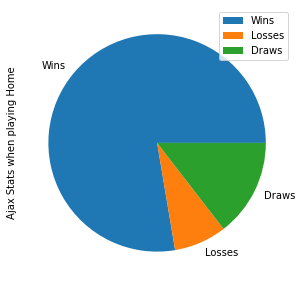

In [52]:
# Plot Ajax Home stats
piePlotAjaxStatsHome = pd.DataFrame({'Ajax Stats when playing Home': [len(AjaxWinHome.index), len(AjaxloseHome.index), len(AjaxDrawHome.index)]},
                  index=['Wins', 'Losses', 'Draws'])
plot = piePlotAjaxStatsHome.plot.pie(y='Ajax Stats when playing Home', figsize=(5, 5))

In [53]:
AjaxWinAway = filtered_matches[ (filtered_matches['home_score'] < filtered_matches['away_score']) & 
                                         (filtered_matches['away'] == "ajax-amsterdam") ]

AjaxGoalsAwayWin = AjaxWinAway['away_score'].sum()
HomeGoalsLoseAgainstAjax = AjaxWinAway['home_score'].sum()

print(f'Ajax won {len(AjaxWinAway.index)} matches Away') 
print(f'Ajax scored {AjaxGoalsAwayWin} goals Away') 
print(f'Ajax got {len(AjaxWinAway.index) * 3} points Away when Ajax won')
print(f'Home team scored {HomeGoalsLoseAgainstAjax} goals when Ajax won')                                               

Ajax won 115 matches Away
Ajax scored 338 goals Away
Ajax got 345 points Away when Ajax won
Home team scored 65 goals when Ajax won


In [54]:
AjaxLoseAway = filtered_matches[ (filtered_matches['home_score'] > filtered_matches['away_score']) & 
                                         (filtered_matches['away'] == "ajax-amsterdam") ]

AjaxGoalsAwayLose = AjaxLoseAway['away_score'].sum()
HomeGoalsWinAgainstAjax = AjaxLoseAway['home_score'].sum()

print(f'Ajax lost {len(AjaxLoseAway.index)} matches Away') 
print(f'Ajax scored {AjaxGoalsAwayLose} goals Away') 
print(f'Home team scored {HomeGoalsWinAgainstAjax} goals when Ajax lost')          

Ajax lost 24 matches Away
Ajax scored 18 goals Away
Home team scored 55 goals when Ajax lost


In [55]:
AjaxDrawAway = filtered_matches[ (filtered_matches['home_score'] == filtered_matches['away_score']) & 
                                         (filtered_matches['away'] == "ajax-amsterdam") ]

AjaxGoalsAwayDraw = AjaxDrawAway['away_score'].sum()
HomeGoalsDrawAgainstAjax = AjaxDrawAway['home_score'].sum()

print(f'Ajax tied {len(AjaxDrawAway.index)} matches Away') 
print(f'Ajax scored {AjaxGoalsAwayDraw} goals Away') 
print(f'Home team scored {HomeGoalsDrawAgainstAjax} goals when Ajax tied')          

Ajax tied 37 matches Away
Ajax scored 47 goals Away
Home team scored 47 goals when Ajax tied


In [56]:
# Total Ajax Goals Away
totalAjaxGoalsAway = AjaxGoalsAwayWin + AjaxGoalsAwayLose + AjaxGoalsAwayDraw
print(f'Ajax scored {totalAjaxGoalsAway} goals Away')

totalAjaxPointsAway = (len(AjaxWinAway.index) * 3) + len(AjaxDrawAway.index)
print(f'Ajax got {totalAjaxPointsAway} points Away')

Ajax scored 403 goals Away
Ajax got 382 points Away


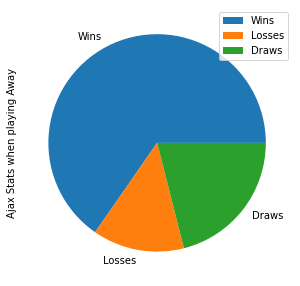

In [57]:
# Plot Ajax Away stats
piePlotAjaxStatsAway = pd.DataFrame({'Ajax Stats when playing Away': [len(AjaxWinAway.index), len(AjaxLoseAway.index), len(AjaxDrawAway.index)]},
                  index=['Wins', 'Losses', 'Draws'])
plot = piePlotAjaxStatsAway.plot.pie(y='Ajax Stats when playing Away', figsize=(5, 5))

In [58]:
# Total Ajax Goals, Winnings, losses and draws
TotalAjaxGoals = totalAjaxGoalsHome + totalAjaxGoalsAway
print(f'Ajax scored {TotalAjaxGoals} goals in total last 10 years')

# points
TotalAjaxPoints = totalAjaxPointsHome + totalAjaxPointsAway
print(f'Ajax got {TotalAjaxPoints} points in total last 10 years')

# winning
TotalAjaxWinning = len(AjaxWinHome.index) + len(AjaxWinAway.index)
print(f'Ajax won {TotalAjaxWinning} matches in total last 10 years')

# losses
TotalAjaxLoses = len(AjaxloseHome.index) + len(AjaxLoseAway.index)
print(f'Ajax lost {TotalAjaxLoses} matches in total last 10 years')

# Draws
TotalAjaxDraws = len(AjaxDrawHome.index) + len(AjaxDrawAway.index)
print(f'Ajax tied {TotalAjaxDraws} matches in total last 10 years')

Ajax scored 925 goals in total last 10 years
Ajax got 825 points in total last 10 years
Ajax won 254 matches in total last 10 years
Ajax lost 38 matches in total last 10 years
Ajax tied 63 matches in total last 10 years


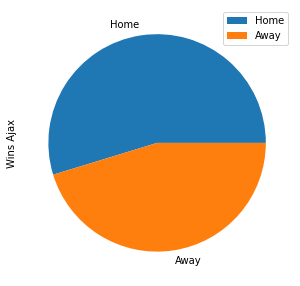

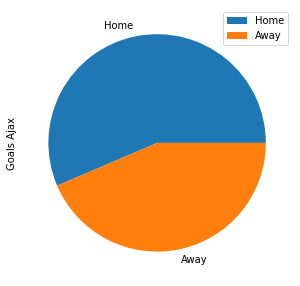

In [59]:
# Plot Ajax Winnings and Points
piePlotAjaxStatsWinnings = pd.DataFrame({'Wins Ajax': [len(AjaxWinHome.index), len(AjaxWinAway.index)]},
                  index=['Home', 'Away'])
plot = piePlotAjaxStatsWinnings.plot.pie(y='Wins Ajax', figsize=(5, 5))

piePlotAjaxStatsGoals = pd.DataFrame({'Goals Ajax': [totalAjaxGoalsHome, totalAjaxGoalsAway]},
                  index=['Home', 'Away'])
plot = piePlotAjaxStatsGoals.plot.pie(y='Goals Ajax', figsize=(5, 5))

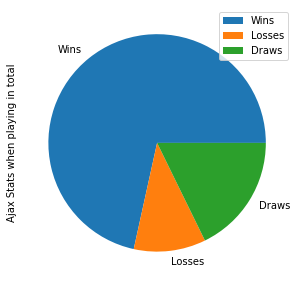

In [60]:
# Plot Ajax stata in total
piePlotAjaxStatsInTotal = pd.DataFrame({'Ajax Stats when playing in total': [TotalAjaxWinning, TotalAjaxLoses, TotalAjaxDraws]},
                  index=['Wins', 'Losses', 'Draws'])
plot = piePlotAjaxStatsInTotal.plot.pie(y='Ajax Stats when playing in total', figsize=(5, 5))

Text(0, 0.5, 'Goals')

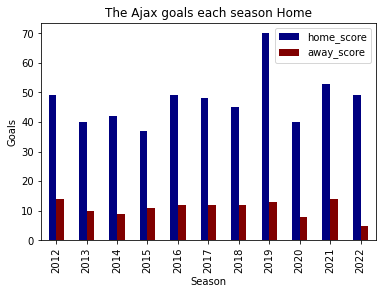

In [61]:
# Ajax Goals Each Season Home
EachSeasonAjaxHome = filtered_matches[ (filtered_matches['home'] == 'ajax-amsterdam')]
GroupBySeasenHome = EachSeasonAjaxHome.groupby(['saison'])[['home_score','away_score']].sum()

# plot Ajax Goals in each Season Home
dfEachSeasonAjaxHome = pd.DataFrame(GroupBySeasenHome)
ax = dfEachSeasonAjaxHome.plot(lw=2, colormap='jet', kind = 'bar', title='The Ajax goals each season Home')
ax.set_xlabel("Season")
ax.set_ylabel("Goals")

Text(0, 0.5, 'Goals')

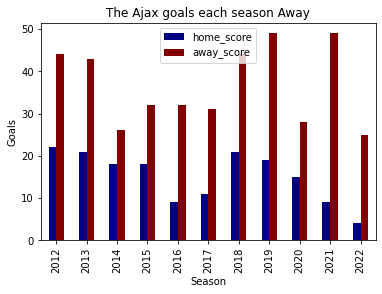

In [62]:
# Ajax Goals Each Season Away
EachSeasonAjaxAway = filtered_matches[ (filtered_matches['away'] == 'ajax-amsterdam')]
GroupBySeasenAway = EachSeasonAjaxAway.groupby(['saison'])[['home_score','away_score']].sum()

# plot Ajax Goals in each Season Away
dfEachSeasonAjaxAway = pd.DataFrame(GroupBySeasenAway)
ax = dfEachSeasonAjaxAway.plot(lw=2, colormap='jet', kind = 'bar', title='The Ajax goals each season Away')
ax.set_xlabel("Season")
ax.set_ylabel("Goals")

Text(0, 0.5, 'Goals')

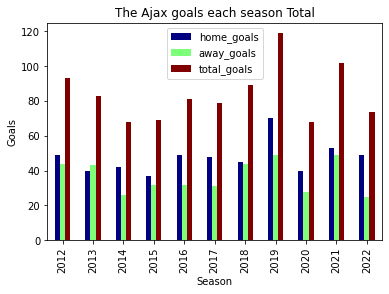

In [63]:
# make new dataframe in order to aggregate
dfAjaxGoalsTotalEachSeason = pd.DataFrame()
AjaxAwayGoals= GroupBySeasenAway['away_score']
AjaxHomeGoals= GroupBySeasenHome['home_score']
dfAjaxGoalsTotalEachSeason['home_goals'] = AjaxHomeGoals
dfAjaxGoalsTotalEachSeason["away_goals"] = AjaxAwayGoals
sum_AllGoalsInEachSeason = dfAjaxGoalsTotalEachSeason["home_goals"] + dfAjaxGoalsTotalEachSeason["away_goals"]
dfAjaxGoalsTotalEachSeason["total_goals"] = sum_AllGoalsInEachSeason


# plot Ajax Goals in each Season Total
dfAjaxGoalsTotalEachSeasonPlot = pd.DataFrame(dfAjaxGoalsTotalEachSeason)
ax = dfAjaxGoalsTotalEachSeasonPlot.plot(lw=2, colormap='jet', kind = 'bar', title='The Ajax goals each season Total')
ax.set_xlabel("Season")
ax.set_ylabel("Goals")

##### PSV General Stats

In [64]:
PSVWinHome = filtered_matches[ (filtered_matches['home_score'] > filtered_matches['away_score']) & 
                                         (filtered_matches['home'] == "psv-eindhoven") ]

PSVGoalsHomeWin =PSVWinHome['home_score'].sum()
AwayGoalsLoseAgaintsPSV =PSVWinHome['away_score'].sum()
print(f'PSV won {len(PSVWinHome.index)} matches Home') 
print(f'PSV score {PSVGoalsHomeWin} goals Home') 
print(f'PSV got {len(PSVWinHome.index) * 3} points Home when he won')
print(f'Away team scored {AwayGoalsLoseAgaintsPSV} goals when PSV won')    

PSV won 144 matches Home
PSV score 450 goals Home
PSV got 432 points Home when he won
Away team scored 86 goals when PSV won


In [65]:
PSVloseHome = filtered_matches[ (filtered_matches['home_score'] < filtered_matches['away_score']) & 
                                         (filtered_matches['home'] == "psv-eindhoven") ]

PSVGoalsHomeLose =PSVloseHome['home_score'].sum()
AwayGoalsWonAgaintsPSV =PSVloseHome['away_score'].sum()
print(f'PSV lost {len(PSVloseHome.index)} matches Home') 
print(f'PSV scored {PSVGoalsHomeLose} goals Home when he lost') 
print(f'Away team scored {AwayGoalsWonAgaintsPSV} goals when PSV lost') 

PSV lost 15 matches Home
PSV scored 14 goals Home when he lost
Away team scored 46 goals when PSV lost


In [66]:
PSVDrawHome = filtered_matches[ (filtered_matches['home_score'] == filtered_matches['away_score']) & 
                                         (filtered_matches['home'] == "psv-eindhoven") ]

PSVGoalsDraw =PSVDrawHome['home_score'].sum()
AwayGoalsDrawPSV =PSVDrawHome['away_score'].sum()

print(f'PSV tied {len(PSVDrawHome.index)} matches Home') 
print(f'PSV scored {PSVGoalsDraw} goals Home when he tied')
print(f'Away team scored {AwayGoalsDrawPSV} goals when he tied with PSV') 

PSV tied 19 matches Home
PSV scored 19 goals Home when he tied
Away team scored 19 goals when he tied with PSV


In [67]:
# Total PSV Goals Home
totalPSVGoalsHome = PSVGoalsHomeWin + PSVGoalsHomeLose + PSVGoalsDraw
print(f'PSV scored {totalPSVGoalsHome} goals Home')

totalPSVPointsHome = (len(PSVWinHome.index) * 3) + len(PSVDrawHome.index)
print(f'PSV got {totalPSVPointsHome} points Home')

PSV scored 483 goals Home
PSV got 451 points Home


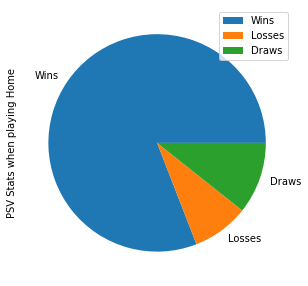

In [68]:
# Plot PSV Home stats
piePlotPSVStatsHome = pd.DataFrame({'PSV Stats when playing Home': [len(PSVWinHome.index), len(PSVloseHome.index), len(PSVDrawHome.index)]},
                  index=['Wins', 'Losses', 'Draws'])
plot = piePlotPSVStatsHome.plot.pie(y='PSV Stats when playing Home', figsize=(5, 5))

In [69]:
PSVWinAway = filtered_matches[ (filtered_matches['home_score'] < filtered_matches['away_score']) & 
                                         (filtered_matches['away'] == "psv-eindhoven") ]

PSVGoalsAwayWin = PSVWinAway['away_score'].sum()
HomeGoalsLoseAgainstPSV = PSVWinAway['home_score'].sum()

print(f'PSV won {len(PSVWinAway.index)} matches Away') 
print(f'PSV score {PSVGoalsAwayWin} goals Away') 
print(f'PSV got {len(PSVWinAway.index) * 3} points Away when he won')
print(f'Home team scores {HomeGoalsLoseAgainstPSV} goals when PSV won')          

PSV won 100 matches Away
PSV score 306 goals Away
PSV got 300 points Away when he won
Home team scores 75 goals when PSV won


In [70]:
PSVLoseAway = filtered_matches[ (filtered_matches['home_score'] > filtered_matches['away_score']) & 
                                         (filtered_matches['away'] == "psv-eindhoven") ]

PSVGoalsAwayLose = PSVLoseAway['away_score'].sum()
HomeGoalsWinAgainstPSV = PSVLoseAway['home_score'].sum()

print(f'PSV lost {len(PSVLoseAway.index)} matches Away') 
print(f'PSV scored {PSVGoalsAwayLose} goals Away') 
print(f'Home team scored {HomeGoalsWinAgainstPSV} goals when PSV lost') 

PSV lost 40 matches Away
PSV scored 24 goals Away
Home team scored 94 goals when PSV lost


In [71]:
PSVDrawAway = filtered_matches[ (filtered_matches['home_score'] == filtered_matches['away_score']) & 
                                         (filtered_matches['away'] == "psv-eindhoven") ]

PSVGoalsAwayDraw = PSVDrawAway['away_score'].sum()
HomeGoalsDrawAgainstPSV = PSVDrawAway['home_score'].sum()

print(f'PSV tied {len(PSVDrawAway.index)} matches Away') 
print(f'PSV scored {PSVGoalsAwayDraw} goals Away') 
print(f'Home team scored {HomeGoalsDrawAgainstPSV} goals when he tied with PSV') 

PSV tied 39 matches Away
PSV scored 60 goals Away
Home team scored 60 goals when he tied with PSV


In [72]:
# Total PSV Goals Away
totalPSVGoalsAway = PSVGoalsAwayWin + PSVGoalsAwayLose + PSVGoalsAwayDraw
print(f'PSV scored {totalPSVGoalsAway} goals away')

totalPSVPointsAway = (len(PSVWinAway.index) * 3) + len(PSVDrawAway.index)
print(f'PSV got {totalPSVPointsAway} points Away')

PSV scored 390 goals away
PSV got 339 points Away


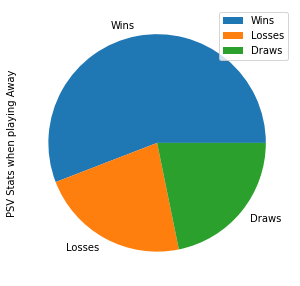

In [73]:
# Plot PSV Away stats
piePlotPSVStatsAway = pd.DataFrame({'PSV Stats when playing Away': [len(PSVWinAway.index), len(PSVLoseAway.index), len(PSVDrawAway.index)]},
                  index=['Wins', 'Losses', 'Draws'])
plot = piePlotPSVStatsAway.plot.pie(y='PSV Stats when playing Away', figsize=(5, 5))

In [74]:
# Total PSV Goals, Winnings, losses and draws
TotalPSVGoals = totalPSVGoalsAway + totalPSVGoalsHome
print(f'PSV scored {TotalPSVGoals} goals in total last 10 years')

# points

TotalPSVPoints = totalPSVPointsAway + totalPSVPointsHome
print(f'PSV got {TotalPSVPoints} points in total last 10 years')

# winning
TotalPSVWinning = len(PSVWinHome.index) + len(PSVWinAway.index)
print(f'PSV won {TotalPSVWinning} matches in total last 10 years')

# losses
TotalPSVLoses = len(PSVloseHome.index) + len(PSVLoseAway.index)
print(f'PSV lost {TotalPSVLoses} matches in total last 10 years')

# Draws
TotalPSVDraws = len(PSVDrawHome.index) + len(PSVDrawAway.index)
print(f'PSV tied {TotalPSVDraws} matches in total last 10 years')

PSV scored 873 goals in total last 10 years
PSV got 790 points in total last 10 years
PSV won 244 matches in total last 10 years
PSV lost 55 matches in total last 10 years
PSV tied 58 matches in total last 10 years


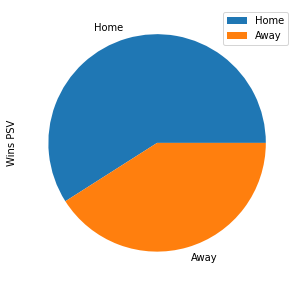

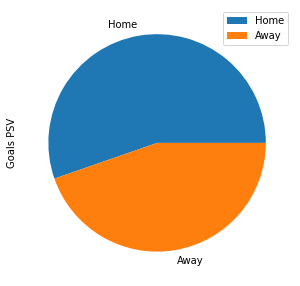

In [75]:
# Plot PSV Winnings and Points
piePlotPSVStatsWinnings = pd.DataFrame({'Wins PSV': [len(PSVWinHome.index), len(PSVWinAway.index)]},
                  index=['Home', 'Away'])
plot = piePlotPSVStatsWinnings.plot.pie(y='Wins PSV', figsize=(5, 5))

piePlotPSVStatsGoals = pd.DataFrame({'Goals PSV': [totalPSVGoalsHome, totalPSVGoalsAway]},
                  index=['Home', 'Away'])
plot = piePlotPSVStatsGoals.plot.pie(y='Goals PSV', figsize=(5, 5))

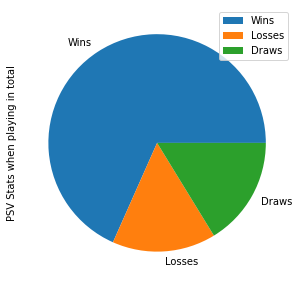

In [76]:
# Plot PSV stats in total
piePlotPSVStatsInTotal = pd.DataFrame({'PSV Stats when playing in total': [TotalPSVWinning, TotalPSVLoses, TotalPSVDraws]},
                  index=['Wins', 'Losses', 'Draws'])
plot = piePlotPSVStatsInTotal.plot.pie(y='PSV Stats when playing in total', figsize=(5, 5))

Text(0, 0.5, 'Goals')

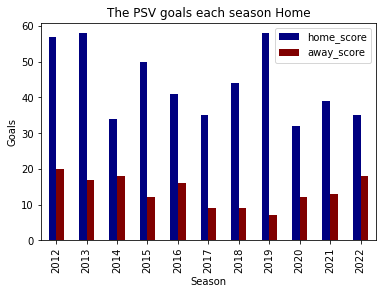

In [77]:
# PSV Goals Each Season Home
EachSeasonPSV = filtered_matches[ (filtered_matches['home'] == 'psv-eindhoven')]
GroupBySeasenHomePSV = EachSeasonPSV.groupby(['saison'])[['home_score','away_score']].sum()

# plot Ajax Goals in each Season Home
dfEachSeasonPSV = pd.DataFrame(GroupBySeasenHomePSV)
ax = dfEachSeasonPSV.plot(lw=2, colormap='jet', kind = 'bar', title='The PSV goals each season Home')
ax.set_xlabel("Season")
ax.set_ylabel("Goals")

Text(0, 0.5, 'Goals')

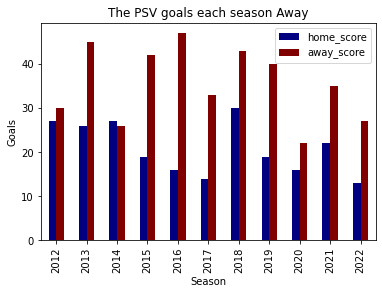

In [78]:
# PSV Goals Each Season Away
EachSeasonPSVAway = filtered_matches[ (filtered_matches['away'] == 'psv-eindhoven')]
GroupBySeasenAwayPSV = EachSeasonPSVAway.groupby(['saison'])[['home_score','away_score']].sum()

# plot Ajax Goals in each Season Away
dfEachSeasonPSVAway = pd.DataFrame(GroupBySeasenAwayPSV)
ax = dfEachSeasonPSVAway.plot(lw=2, colormap='jet', kind = 'bar', title='The PSV goals each season Away')
ax.set_xlabel("Season")
ax.set_ylabel("Goals")

Text(0, 0.5, 'Goals')

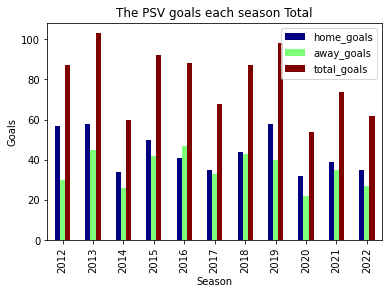

In [79]:
# make new dataframe in order to aggregate
dfPSVGoalsTotalEachSeason = pd.DataFrame()
PSVAwayGoals= GroupBySeasenAwayPSV['away_score']
PSVHomeGoals= GroupBySeasenHomePSV['home_score']
dfPSVGoalsTotalEachSeason['home_goals'] = PSVHomeGoals
dfPSVGoalsTotalEachSeason["away_goals"] = PSVAwayGoals
sum_AllGoalsInEachSeason = dfPSVGoalsTotalEachSeason["home_goals"] + dfPSVGoalsTotalEachSeason["away_goals"]
dfPSVGoalsTotalEachSeason["total_goals"] = sum_AllGoalsInEachSeason


# plot Ajax Goals in each Season Total
dfPSVGoalsTotalEachSeasonPlot = pd.DataFrame(dfPSVGoalsTotalEachSeason)
ax = dfPSVGoalsTotalEachSeasonPlot.plot(lw=2, colormap='jet', kind = 'bar', title='The PSV goals each season Total')
ax.set_xlabel("Season")
ax.set_ylabel("Goals")

##### Comparison between the two sides in the league

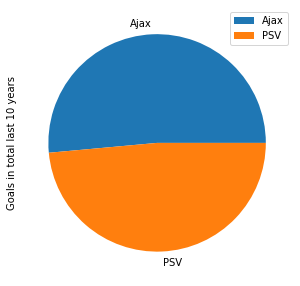

In [80]:
# Goals 
piePlotAJAXVsPSVGOALS = pd.DataFrame({'Goals in total last 10 years': [TotalAjaxGoals, TotalPSVGoals]},
                  index=['Ajax', 'PSV'])
plot = piePlotAJAXVsPSVGOALS.plot.pie(y='Goals in total last 10 years', figsize=(5, 5))

<AxesSubplot:title={'center':'Winnings in total last 10 years'}>

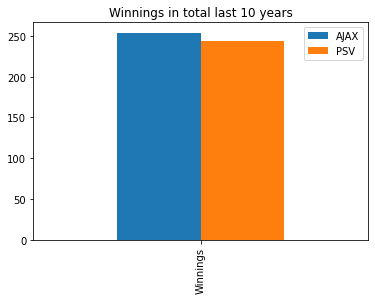

In [81]:
# winning
plotdata = pd.DataFrame({
    "AJAX": TotalAjaxWinning,
    "PSV": TotalPSVWinning
    },
    index=['Winnings'],
   
)
plotdata.plot(kind = 'bar', title ="Winnings in total last 10 years")

<AxesSubplot:title={'center':'Losses in total last 10 years'}>

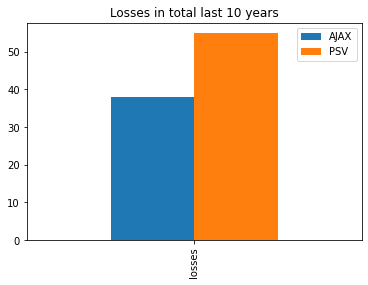

In [82]:
# losses
plotdata = pd.DataFrame({
    "AJAX": TotalAjaxLoses,
    "PSV": TotalPSVLoses
    },
    index=['losses'],
   
)
plotdata.plot(kind = 'bar', title ="Losses in total last 10 years")

<AxesSubplot:title={'center':'Draws in total last 10 years'}>

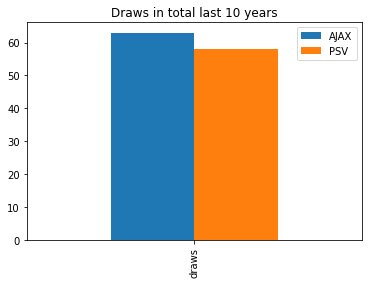

In [83]:
# draws
plotdata = pd.DataFrame({
    "AJAX": TotalAjaxDraws,
    "PSV": TotalPSVDraws
    },
    index=['draws'],
   
)
plotdata.plot(kind = 'bar', title ="Draws in total last 10 years")

##### PSV VS Ajax (Matches)

#### PSV Stadion

In [84]:
PSVWinHomeAgainstAjax = filtered_matches[ (filtered_matches['home_score'] > filtered_matches['away_score']) & 
                                         (filtered_matches['home'] == "psv-eindhoven") &
                                         (filtered_matches['away'] == "ajax-amsterdam") ]

PSVGoalsHomeAgainstAjaxWin = PSVWinHomeAgainstAjax['home_score'].sum()
AjaxGoalsAwayAgainstPSVLose = PSVWinHomeAgainstAjax['away_score'].sum()

print(f'PSV won {len(PSVWinHomeAgainstAjax.index)} matches Home against Ajax') 
print(f'PSV scores {PSVGoalsHomeAgainstAjaxWin} goals Home against Ajax')
print(f'Ajax scores {AjaxGoalsAwayAgainstPSVLose} goals againt PSV in PSV stadion') 

PSV won 4 matches Home against Ajax
PSV scores 11 goals Home against Ajax
Ajax scores 0 goals againt PSV in PSV stadion


In [85]:
PSVLoseHomeAgainstAjax = filtered_matches[ (filtered_matches['home_score'] < filtered_matches['away_score']) & 
                                         (filtered_matches['home'] == "psv-eindhoven") &
                                         (filtered_matches['away'] == "ajax-amsterdam") ]

PSVGoalsHomeAgainstAjaxLose = PSVLoseHomeAgainstAjax['home_score'].sum()
AjaxGoalsAwayAgainstPSVWin = PSVLoseHomeAgainstAjax['away_score'].sum()

print(f'PSV lose {len(PSVLoseHomeAgainstAjax.index)} matches Home against Ajax') 
print(f'PSV scores {PSVGoalsHomeAgainstAjaxLose} goals Home against Ajax')
print(f'Ajax scores {AjaxGoalsAwayAgainstPSVWin} goals againt PSV in PSV stadion') 

PSV lose 4 matches Home against Ajax
PSV scores 4 goals Home against Ajax
Ajax scores 10 goals againt PSV in PSV stadion


In [86]:
PSVDrawHomeAgainstAjax = filtered_matches[ (filtered_matches['home_score'] == filtered_matches['away_score']) & 
                                         (filtered_matches['home'] == "psv-eindhoven") &
                                         (filtered_matches['away'] == "ajax-amsterdam") ]

PSVGoalsHomeAgainstAjaxDraw = PSVDrawHomeAgainstAjax['home_score'].sum()
AjaxGoalsAwayAgainstPSVDraw = PSVDrawHomeAgainstAjax['away_score'].sum()

print(f'PSV tied {len(PSVDrawHomeAgainstAjax.index)} matches Home against Ajax') 
print(f'PSV scored {PSVGoalsHomeAgainstAjaxDraw} goals Home against Ajax')
print(f'Ajax scored {AjaxGoalsAwayAgainstPSVDraw} goals against PSV in PSV stadion') 

PSV tied 3 matches Home against Ajax
PSV scored 4 goals Home against Ajax
Ajax scored 4 goals against PSV in PSV stadion


In [87]:
# total Goals and points in PSV stadion
totalPSVGoalsVsAjaxHome = PSVGoalsHomeAgainstAjaxWin + PSVGoalsHomeAgainstAjaxLose + PSVGoalsHomeAgainstAjaxDraw
print(f'PSV scored {totalPSVGoalsVsAjaxHome} goals against Ajax in PSV stadion last 10 years') 

totalPSVPointsVsAjaxHome = (len(PSVWinHomeAgainstAjax.index) * 3) + len(PSVDrawHomeAgainstAjax.index)
print(f'PSV got {totalPSVPointsVsAjaxHome} points against Ajax in PSV stadion last 10 years') 

totalAjaxGoalsVsPSVAway = AjaxGoalsAwayAgainstPSVWin + AjaxGoalsAwayAgainstPSVLose + AjaxGoalsAwayAgainstPSVDraw
print(f'AJAX scored {totalAjaxGoalsVsPSVAway} goals against PSV in PSV stadion last 10 years') 

totalAjaxPointsVsPSVAway = (len(PSVLoseHomeAgainstAjax.index) * 3) + len(PSVDrawHomeAgainstAjax.index)
print(f'Ajax got {totalAjaxPointsVsPSVAway} points against PSV in PSV stadion last 10 years') 

PSV scored 19 goals against Ajax in PSV stadion last 10 years
PSV got 15 points against Ajax in PSV stadion last 10 years
AJAX scored 14 goals against PSV in PSV stadion last 10 years
Ajax got 15 points against PSV in PSV stadion last 10 years


<AxesSubplot:title={'center':'PSV vs Ajax (PSV) at PSV Stadion'}>

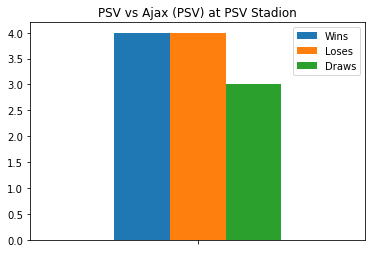

In [88]:
plotdata = pd.DataFrame({
    "Wins": len(PSVWinHomeAgainstAjax.index),
    "Loses": len(PSVLoseHomeAgainstAjax.index),
    "Draws": len(PSVDrawHomeAgainstAjax.index)
    },
    index=[''],
   
)
plotdata.plot(kind = 'bar', title ="PSV vs Ajax (PSV) at PSV Stadion")

#### Ajax Stadion

In [89]:
AjaxWinHomeAgainstPSV = filtered_matches[ (filtered_matches['home_score'] > filtered_matches['away_score']) & 
                                         (filtered_matches['home'] == "ajax-amsterdam") &
                                         (filtered_matches['away'] == "psv-eindhoven") ]

AjaxGoalsHomeAgainstPSVWin = AjaxWinHomeAgainstPSV['home_score'].sum()
PSVGoalsAwayAgainstAjaxLose = AjaxWinHomeAgainstPSV['away_score'].sum()

print(f'Ajax won {len(AjaxWinHomeAgainstPSV.index)} matches Home against PSV') 
print(f'Ajax scored {AjaxGoalsHomeAgainstPSVWin} goals Home against PSV')
print(f'PSV scored {PSVGoalsAwayAgainstAjaxLose} goals againt AJAX in AJAX stadion') 

Ajax won 7 matches Home against PSV
Ajax scored 18 goals Home against PSV
PSV scored 2 goals againt AJAX in AJAX stadion


In [90]:
AjaxLoseHomeAgainstPSV = filtered_matches[ (filtered_matches['home_score'] < filtered_matches['away_score']) & 
                                         (filtered_matches['home'] == "ajax-amsterdam") &
                                         (filtered_matches['away'] == "psv-eindhoven") ]

AjaxGoalsHomeAgainstPSVLose = AjaxLoseHomeAgainstPSV['home_score'].sum()
PSVGoalsAwayAgainstAjaxWin = AjaxLoseHomeAgainstPSV['away_score'].sum()

print(f'Ajax lost {len(AjaxLoseHomeAgainstPSV.index)} matches Home against PSV') 
print(f'Ajax scored {AjaxGoalsHomeAgainstPSVLose} goals Home against PSV')
print(f'PSV scored {PSVGoalsAwayAgainstAjaxWin} goals againt AJAX in AJAX stadion') 

Ajax lost 2 matches Home against PSV
Ajax scored 2 goals Home against PSV
PSV scored 5 goals againt AJAX in AJAX stadion


In [91]:
AjaxDrawHomeAgainstPSV = filtered_matches[ (filtered_matches['home_score'] == filtered_matches['away_score']) & 
                                         (filtered_matches['home'] == "ajax-amsterdam") &
                                         (filtered_matches['away'] == "psv-eindhoven") ]

AjaxGoalsHomeAgainstPSVDraw = AjaxDrawHomeAgainstPSV['home_score'].sum()
PSVGoalsAwayAgainstAjaxDraw = AjaxDrawHomeAgainstPSV['away_score'].sum()

print(f'Ajax tied {len(AjaxDrawHomeAgainstPSV.index)} matches Home against PSV') 
print(f'Ajax scored {AjaxGoalsHomeAgainstPSVDraw} goals Home against PSV')
print(f'PSV scored {PSVGoalsAwayAgainstAjaxDraw} goals againt AJAX in AJAX stadion') 

# TODO
# compare the stats between PSV and AJAX in 1 chart
# combine away and home in 1 chart

Ajax tied 2 matches Home against PSV
Ajax scored 3 goals Home against PSV
PSV scored 3 goals againt AJAX in AJAX stadion


In [92]:
# total Goals and points in Ajax stadion
totalAjaxGoalsVsPSVHome = AjaxGoalsHomeAgainstPSVWin + AjaxGoalsHomeAgainstPSVLose + AjaxGoalsHomeAgainstPSVDraw
print(f'AJAX scored {totalAjaxGoalsVsPSVHome} goals against PSV in Ajax stadion last 10 years') 

totalAjaxPointsVsPSVHome = (len(AjaxWinHomeAgainstPSV.index) * 3) + len(AjaxDrawHomeAgainstPSV.index)
print(f'Ajax got {totalAjaxPointsVsPSVHome} points against PSV in Ajax stadion last 10 years') 

totalPSVGoalsVsAjaxAway = PSVGoalsAwayAgainstAjaxWin + PSVGoalsAwayAgainstAjaxLose + PSVGoalsAwayAgainstAjaxDraw
print(f'PSV scored {totalPSVGoalsVsAjaxAway} goals against Ajax in Ajax stadion last 10 years') 

totalPSVPointsVsAjaxAway = (len(AjaxLoseHomeAgainstPSV.index) * 3) + len(AjaxDrawHomeAgainstPSV.index)
print(f'PSV got {totalPSVPointsVsAjaxAway} points against Ajax in Ajax stadion last 10 years') 

AJAX scored 23 goals against PSV in Ajax stadion last 10 years
Ajax got 23 points against PSV in Ajax stadion last 10 years
PSV scored 10 goals against Ajax in Ajax stadion last 10 years
PSV got 8 points against Ajax in Ajax stadion last 10 years


<AxesSubplot:title={'center':'PSV vs Ajax (Ajax) at Ajax Stadion'}>

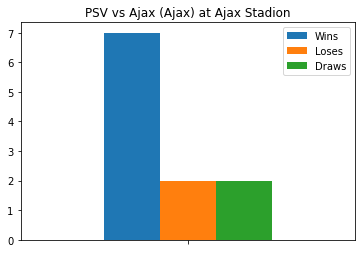

In [93]:
plotdata = pd.DataFrame({
    "Wins": len(AjaxWinHomeAgainstPSV.index),
    "Loses": len(AjaxLoseHomeAgainstPSV.index),
    "Draws": len(AjaxDrawHomeAgainstPSV.index)
    },
    index=[''],
   
)
plotdata.plot(kind = 'bar', title ="PSV vs Ajax (Ajax) at Ajax Stadion")

In [94]:
# total goals, points, winnings, losses and draws for each time
# Goals
TotalGoalsAjaxVSPSV = totalAjaxGoalsVsPSVAway + totalAjaxGoalsVsPSVHome 
print(f'Ajax scored {TotalGoalsAjaxVSPSV} goals against PSV last 10 years') 

TotalGoalsPsvVSAjax = totalPSVGoalsVsAjaxHome + totalPSVGoalsVsAjaxAway 
print(f'PSV scored {TotalGoalsPsvVSAjax} goals against Ajax last 10 years') 

# Points
TotalPointsAjaxVSPSV = totalAjaxPointsVsPSVHome + totalAjaxPointsVsPSVAway
print(f'Ajax got {TotalPointsAjaxVSPSV} points against PSV last 10 years') 

TotalPointsPsvVSAjax = totalPSVPointsVsAjaxHome + totalPSVPointsVsAjaxAway
print(f'PSV got {TotalPointsPsvVSAjax} points against Ajax last 10 years')

# Winnings
TotalWinningsAjaxVSPSV = len(PSVLoseHomeAgainstAjax.index) + len(AjaxWinHomeAgainstPSV.index)
print(f'Ajax won {TotalWinningsAjaxVSPSV} matches against PSV last 10 years')

TotalWinningsPsvVSAjax = len(AjaxLoseHomeAgainstPSV.index) + len(PSVWinHomeAgainstAjax.index)
print(f'PSV won {TotalWinningsPsvVSAjax} matches against Ajax last 10 years')

# losses
TotalLossesAjaxVSPSV = len(AjaxLoseHomeAgainstPSV.index) + len(PSVWinHomeAgainstAjax.index)
print(f'Ajax lost {TotalLossesAjaxVSPSV} matches against PSV last 10 years')

TotalLossesPsvVSAjax = len(PSVLoseHomeAgainstAjax.index) + len(AjaxWinHomeAgainstPSV.index)
print(f'PSV lost {TotalLossesPsvVSAjax} matches against Ajax last 10 years')


# Draws
TotalDrawssAjaxVSPSV = len(AjaxDrawHomeAgainstPSV.index) + len(PSVDrawHomeAgainstAjax.index)
print(f'Ajax tied {TotalDrawssAjaxVSPSV} matches against PSV last 10 years')

TotalDrawsPsvVSAjax = len(AjaxDrawHomeAgainstPSV.index) + len(PSVDrawHomeAgainstAjax.index)
print(f'PSV tied {TotalDrawssAjaxVSPSV} matches against Ajax last 10 years')

Ajax scored 37 goals against PSV last 10 years
PSV scored 29 goals against Ajax last 10 years
Ajax got 38 points against PSV last 10 years
PSV got 23 points against Ajax last 10 years
Ajax won 11 matches against PSV last 10 years
PSV won 6 matches against Ajax last 10 years
Ajax lost 6 matches against PSV last 10 years
PSV lost 11 matches against Ajax last 10 years
Ajax tied 5 matches against PSV last 10 years
PSV tied 5 matches against Ajax last 10 years


<AxesSubplot:title={'center':'PSV vs Ajax Goals in total'}>

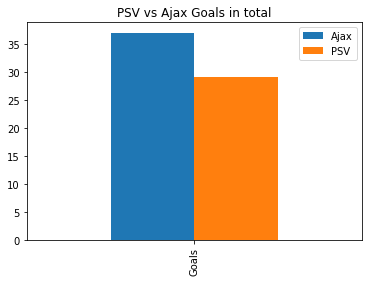

In [95]:
plotdata = pd.DataFrame({
    "Ajax": TotalGoalsAjaxVSPSV,
    "PSV": TotalGoalsPsvVSAjax
    },
    index=['Goals'],
   
)
plotdata.plot(kind = 'bar', title ="PSV vs Ajax Goals in total")

<AxesSubplot:title={'center':'PSV vs Ajax Points in total'}>

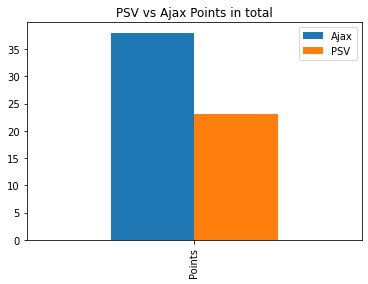

In [96]:
plotdata = pd.DataFrame({
    "Ajax": TotalPointsAjaxVSPSV,
    "PSV": TotalPointsPsvVSAjax
    },
    index=['Points'],
   
)
plotdata.plot(kind = 'bar', title ="PSV vs Ajax Points in total")

## Changing the players

In [97]:
# How much subs did the home and away teams made 
# we drop the unneccesary columns 
filtered_subs = raw_subs_file.drop(columns=['minute','player','round','saison'])
filtered_subs["in"].replace({False: 0, True: 1 }, inplace=True)

filterHomeTeamSubs = filtered_subs[ (filtered_subs['home'] == filtered_subs['team'])]
filterAwayTeamSubs = filtered_subs[ (filtered_subs['away'] == filtered_subs['team'])]

# How much subs Home team made
filterSubsHome = filterHomeTeamSubs[ (filterHomeTeamSubs['in'] == 1)]
print(f'{len(filterSubsHome.index)} subs the home team made')

# How much subs Away team made
filterSubsAway = filterAwayTeamSubs[ (filterAwayTeamSubs['in'] == 1)]
print(f'{len(filterSubsAway.index)} subs the Away team made')

31728 subs the home team made
32505 subs the Away team made


### AJAX VS PSV Stats

#### Goals

In [98]:
ajaxGoalsHome = filterAssist[ (filterAssist['home'] == 'ajax-amsterdam')]

print(f'Ajax Amsterdam Home Goals {len(ajaxGoalsHome.index)}')


ajaxGoalsAway = filterAssist[ (filterAssist['away'] == 'ajax-amsterdam')]

print(f'Ajax Amsterdam Away Goals {len(ajaxGoalsAway.index)}')


psvGoalsHome = filterAssist[ (filterAssist['home'] == 'psv-eindhoven')]

print(f'psv eindhoven Home Goals {len(psvGoalsHome.index)}')

psvGoalsAway = filterAssist[ (filterAssist['away'] == 'psv-eindhoven')]

print(f'psv eindhoven Away Goals {len(psvGoalsAway.index)}')

Ajax Amsterdam Home Goals 443
Ajax Amsterdam Away Goals 366
psv eindhoven Home Goals 408
psv eindhoven Away Goals 393


<AxesSubplot:>

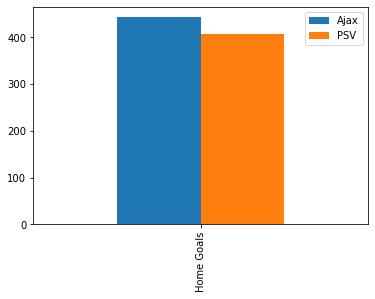

In [99]:
plotdata = pd.DataFrame({
    "Ajax": len(ajaxGoalsHome.index),
    "PSV": len(psvGoalsHome.index)
    }, 
    index=["Home Goals"]
)
plotdata.plot(kind="bar")

<AxesSubplot:>

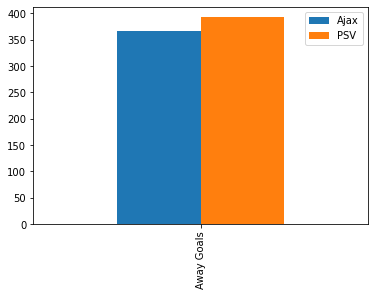

In [100]:
plotdata = pd.DataFrame({
    "Ajax": len(ajaxGoalsAway.index),
    "PSV": len(psvGoalsAway.index)
    }, 
    index=["Away Goals"]
)
plotdata.plot(kind="bar")